Imports

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Задание 1

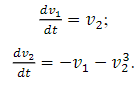

In [4]:
matr = np.array(
    [
        [0, 1],
        [-1, 0]
    ]
)
matr

array([[ 0,  1],
       [-1,  0]])

Собстеннве значения 

In [7]:
eig = np.linalg.eig(matr)
eig[0]

array([0.+1.j, 0.-1.j])

Модуляция

In [13]:
def ode(y, t, с):
    v_1, v_2 = y
    dv_1 = v_2
    dv_2 = -v_1 - v_2**3
    return [dv_1, dv_2]

In [14]:
def calcODE(args, y0, dy0, ts = 10, nt = 101): 
    y0 = [y0, dy0] 
    t = np.linspace(0, ts, nt) 
    sol = odeint(ode, y0, t, args) 
    return sol

In [15]:
def drawPhasePortrait(
        args, 
        deltaX = 1, 
        deltaDX = 1, 
        startX = 0,  
        stopX = 5, 
        startDX = 0, 
        stopDX = 5, 
        ts = 10, 
        nt = 101
    ): 
    for y0 in range(startX, stopX, deltaX): 
            for dy0 in range(startDX, stopDX, deltaDX): 
                sol = calcODE(args, y0, dy0, ts, nt) 
                plt.plot(sol[:, 0], sol[:, 1], 'b') 
    plt.xlabel('x') 
    plt.ylabel('dx/dt') 
    plt.grid() 
    plt.show()

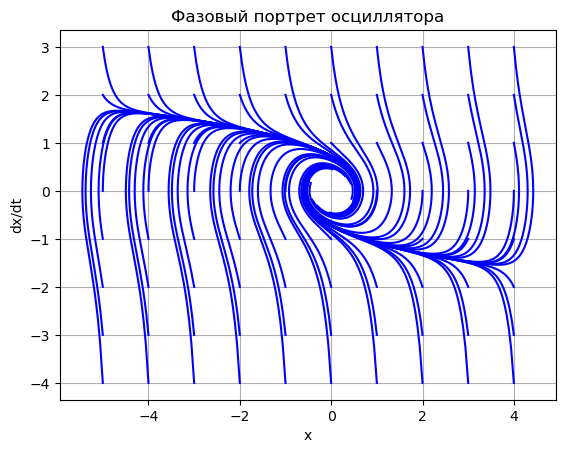

In [18]:
c = 2 # Параметр ОДУ (длина маятника)  
args=(c, ) 
plt.title('Фазовый портрет осциллятора')
drawPhasePortrait(args,  1,  1,  -5,  5,  -4,  4,  ts  =  5,  nt  = 
301)

In [26]:
f = 2

In [27]:
def nonlinear_system(t, z):
    z1, z2, z3 = z
    u = z1
    du = f - u**2
    dz1 = z2
    dz2 = z3
    dz3 = (2 - du)**2 - du - 3 * (dz1 + dz2)
    return [dz1, dz2, dz3]

Положение равновесия

In [25]:
a, b, c = 1, 1, -f
roots = np.roots([a, b, c])
equilibriums = [(r, 0, 0) for r in roots.real if np.isreal(r)]
equilibriums

[(-2.0, 0, 0), (1.0, 0, 0)]

Линеризация

In [ ]:
z1_eq = roots[0].real
z2_eq = 0
z3_eq = 0
u_eq = z1_eq

In [30]:
A = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [-3*(2*z1_eq + 1), -3, -3]
])
A

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 9., -3., -3.]])

In [33]:
eig = np.linalg.eigvals(A)
eig[0]

(1.1544346900318834+0j)

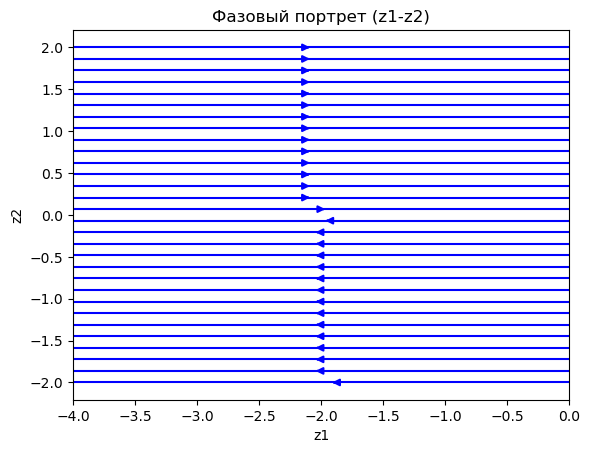

In [34]:
def plot_phase_portrait(A, eq_point):
    x1 = np.linspace(eq_point[0]-2, eq_point[0]+2, 20)
    x2 = np.linspace(-2, 2, 20)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = np.zeros_like(X1)
    U = X2
    V = X3
    W = A[2,0]*(X1-eq_point[0]) + A[2,1]*X2 + A[2,2]*X3
    plt.streamplot(X1, X2, U, V, color="b")
    plt.title("Фазовый портрет (z1-z2)")
    plt.xlabel("z1")
    plt.ylabel("z2")
    plt.show()

plot_phase_portrait(A, (z1_eq, z2_eq, z3_eq))

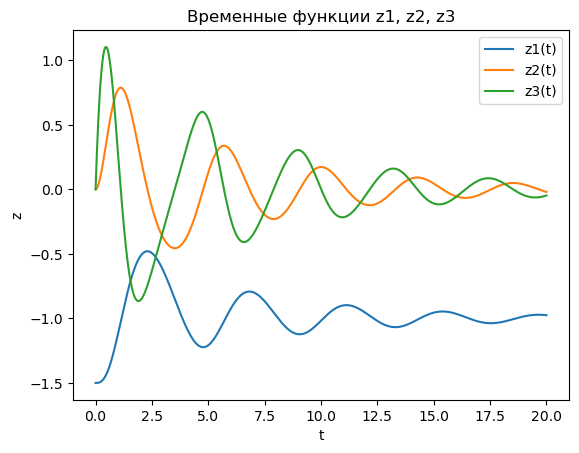

In [35]:
t_span = [0, 20]
z0 = [z1_eq + 0.5, 0, 0]
sol = solve_ivp(nonlinear_system, t_span, z0, t_eval=np.linspace(*t_span, 1000))
plt.plot(sol.t, sol.y[0], label="z1(t)")
plt.plot(sol.t, sol.y[1], label="z2(t)")
plt.plot(sol.t, sol.y[2], label="z3(t)")
plt.xlabel("t")
plt.ylabel("z")
plt.legend()
plt.title("Временные функции z1, z2, z3")
plt.show()